# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>
## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1 - Importing and Cleaning Data 

In [2]:
df = pd.read_csv(r'Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Converting all the values to lower case

In [7]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

### Cleaning the data - Since we have too many values which is given as 'Select', we will consider them as null

In [8]:
df = df.replace('select',np.nan)

### Checking for the unique values in the columns

In [9]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### So we can see from above result, there are many columns, where we have a unique value. So, that is of no use in analysis.
### We will drop them

In [10]:
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

### Now we need to check for the null values

In [11]:
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

### Now we need to remove columns with more than 35% of null data. Since Specialization as an important column variable, will keep it as an exception.

In [12]:
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


### Now we still have got huge number of null values in 4 columns, namely 'Country','Specialization', 'What is your current occupation' and 'What matters most to you in choosing a course'. However removing columns with such an important piece of information would not be a wise idea. Hence we need to keep it. We will replace the null values with 'Missing Information'.

In [13]:
df2['Specialization'] = df2['Specialization'].fillna('Missing Value') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('Missing Value')
df2['Country'] = df2['Country'].fillna('Missing Value')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('Missing Value')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [14]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [15]:
print(df2.nunique(axis=0))

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            39
Specialization                                     19
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

### Now we can see that there is a categorical column "Country" which has many unique values (39). Lets have a look at the number of different values in "Country" Column.

In [16]:
df2["Country"].value_counts()

india                   6492
Missing Value           2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

### We can observe that Except "India" and "Missing Information", rest of the unique values constiute very low percentage in country column.

### So we can club them in one group.

In [17]:
def location(x):
    country = ""
    if x == "india":
        country = "india"
    elif x == "Missing Value":
        country = "Missing Value"
    else:
        country = "Foreign Country"
    return country

df2['Country'] = df2.apply(lambda x:location(x['Country']), axis = 1)
df2['Country'].value_counts()

india              6492
Missing Value      2461
Foreign Country     287
Name: Country, dtype: int64

### Rechecking the percentage of missing values

In [18]:
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

### Since the number of missing values is maximum 1.48%, we can remove the rows which have those missing values.

In [19]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [20]:
round(100*(df3.isnull().sum()/len(df3.index)), 2) ## Now we can see that there are no rows left with null value

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

### Now since Prospect ID is unique for everyone, we can remove the column

In [21]:
df_updated = df3.drop('Prospect ID',1)
df_updated.shape

(9074, 21)

# STEP 2 - Exploratory Data Analysis

### Now we will perform Univariate Analysis categorical variales of the final dataframe 

In [22]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

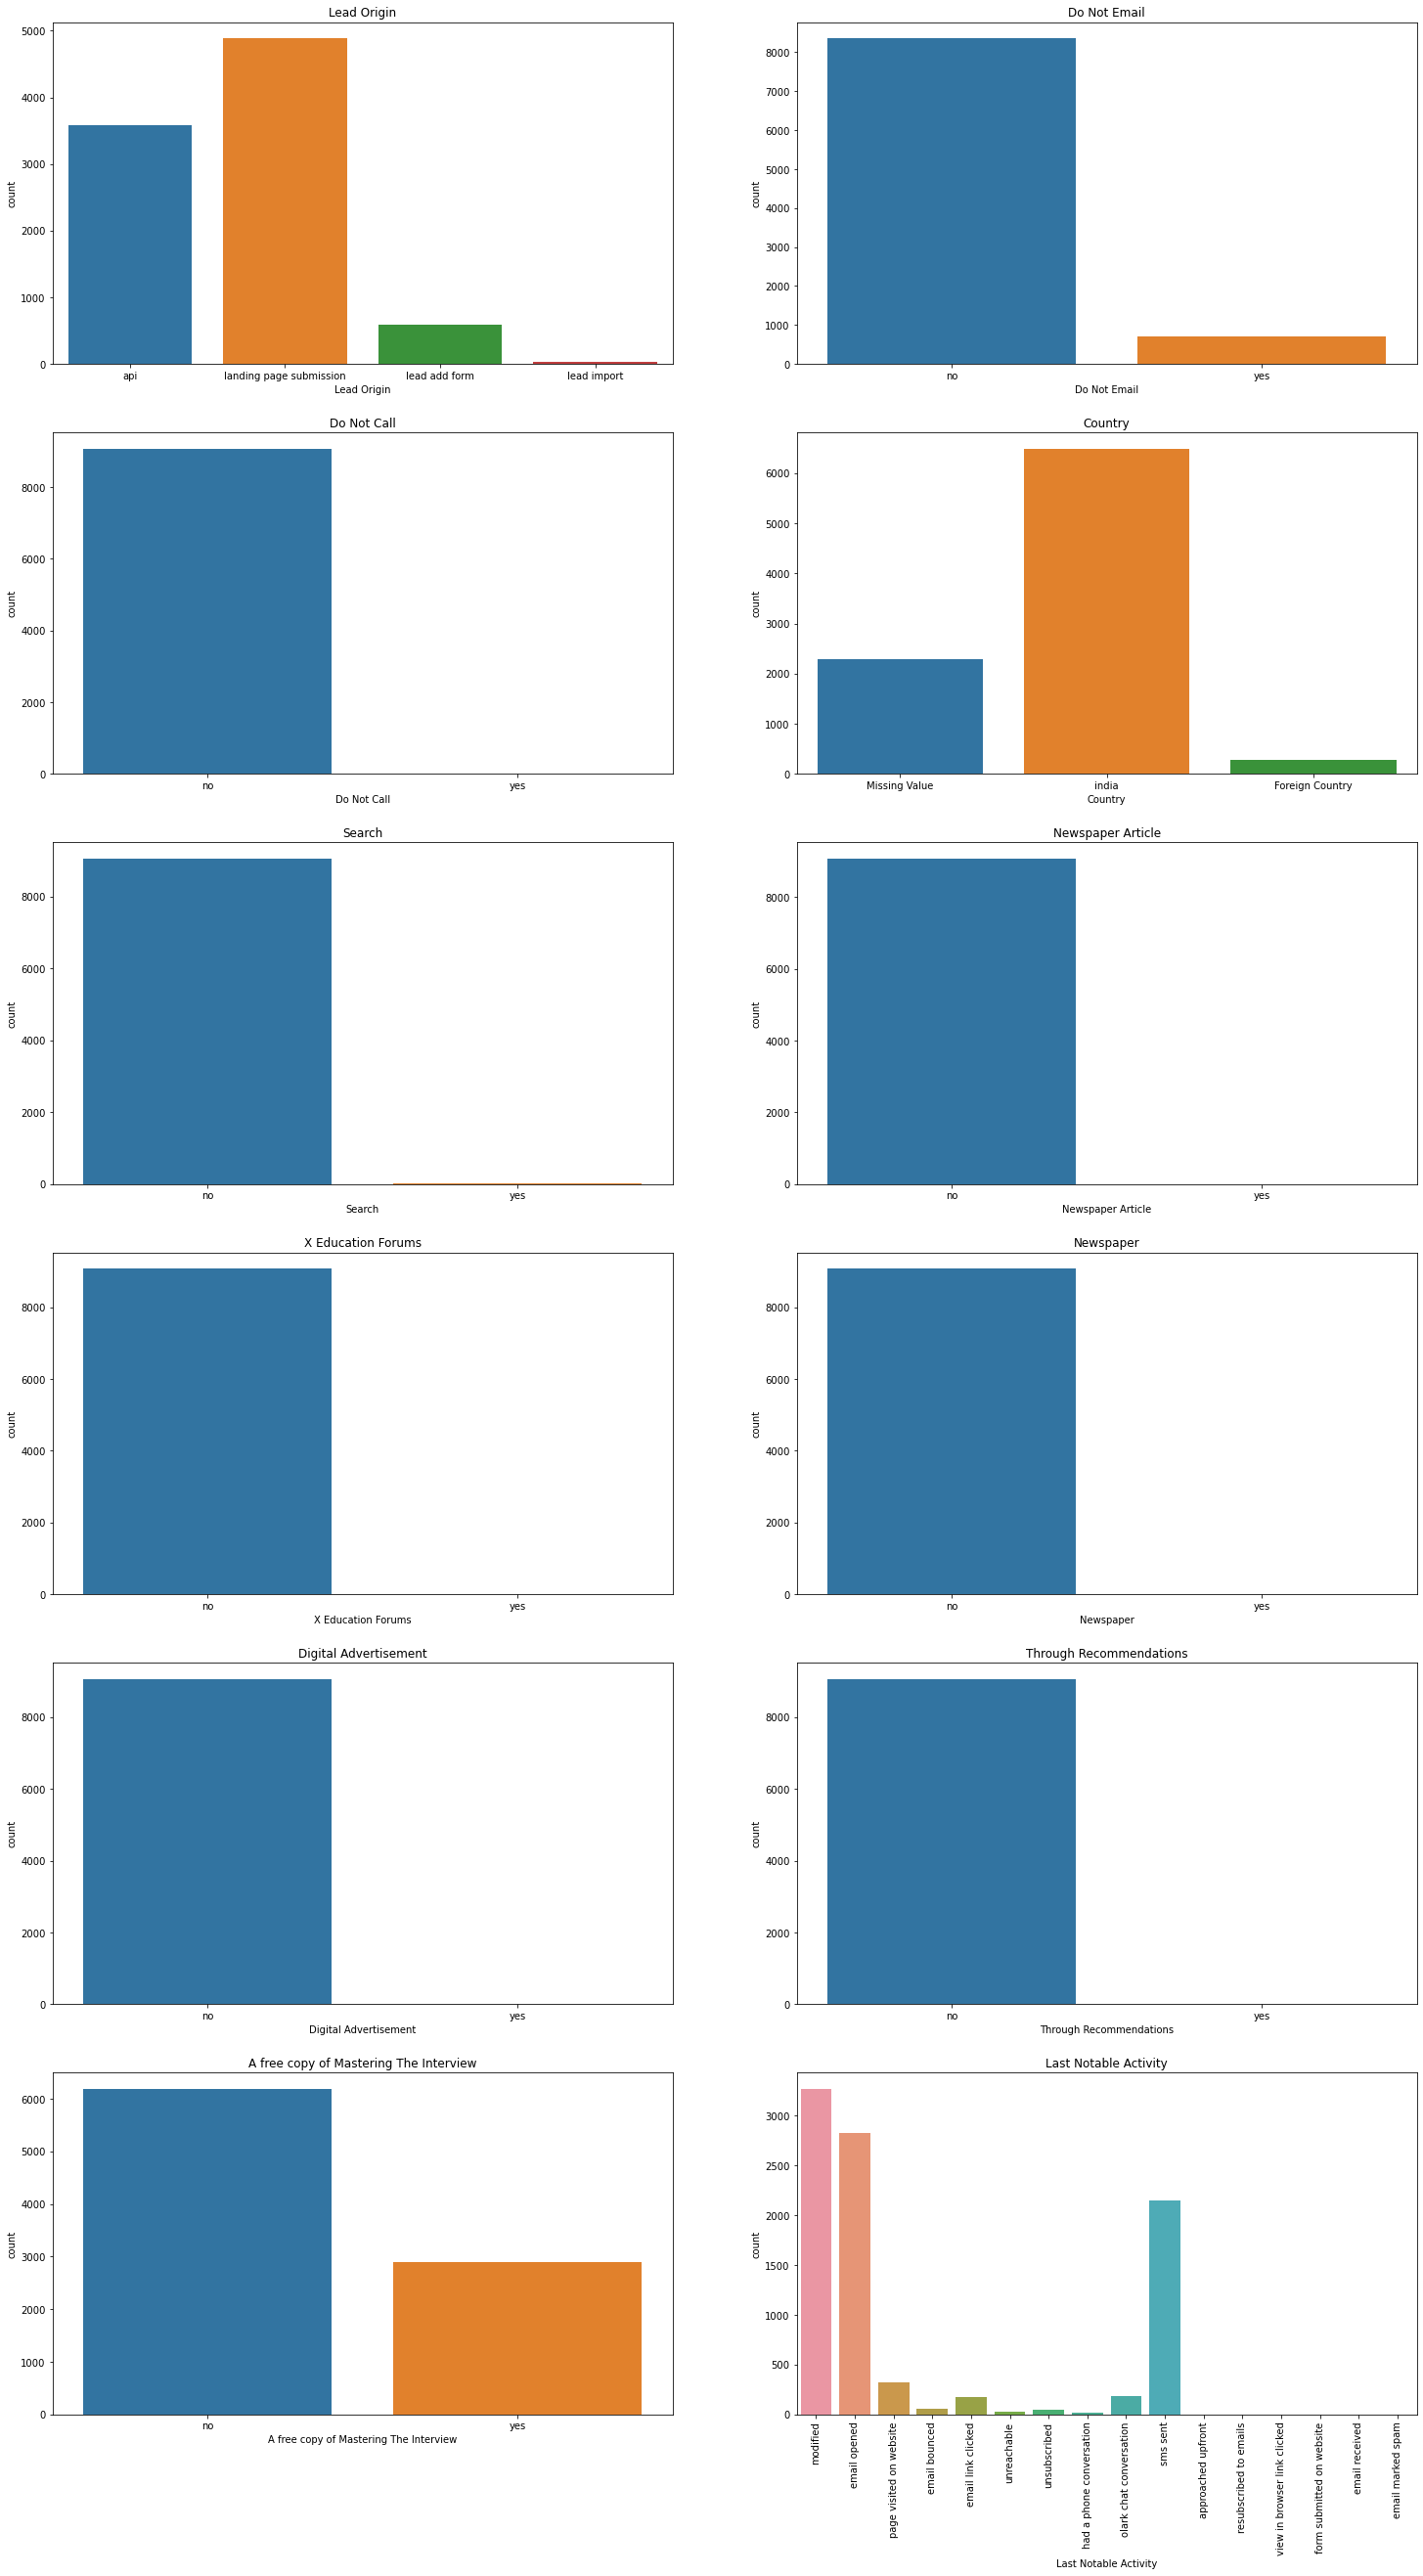

In [23]:
plt.figure(figsize = (25,45))

plt.subplot(6,2,1)
sns.countplot(df_updated['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_updated['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_updated['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_updated['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_updated['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_updated['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_updated['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_updated['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_updated['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_updated['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_updated['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_updated['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

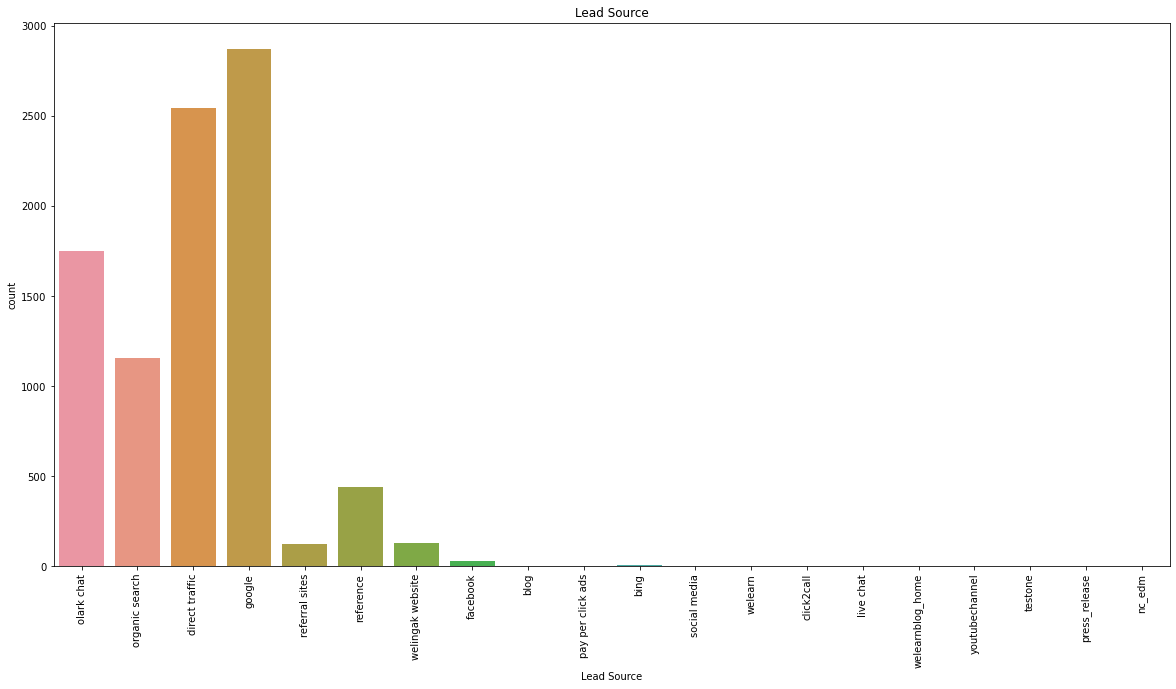

In [24]:
plt.figure(figsize = (20,10))

sns.countplot(df_updated['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

Text(0.5, 1.0, 'Current Occupation')

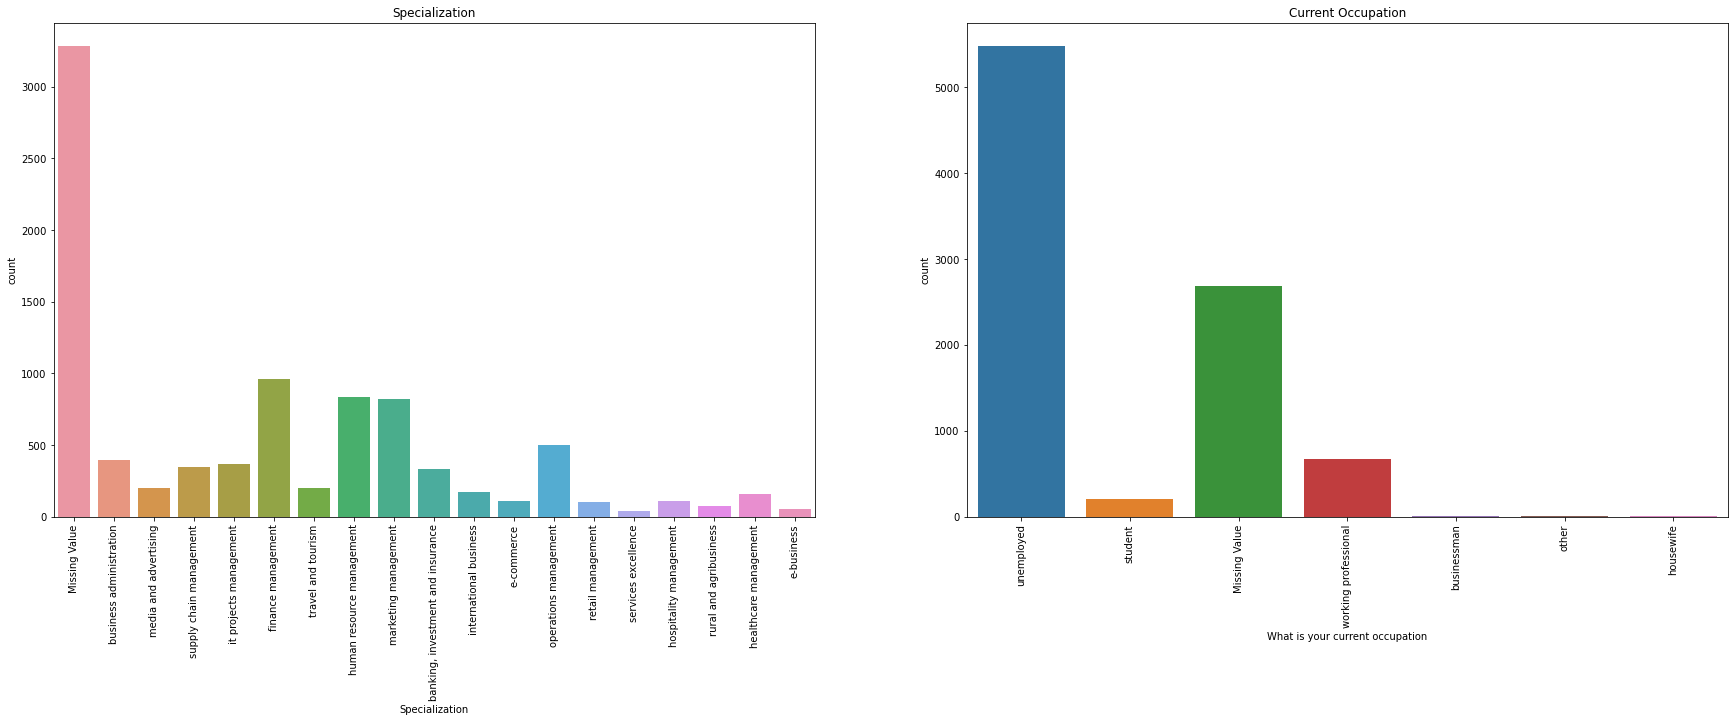

In [25]:
plt.figure(figsize = (30,20))
plt.subplot(2,2,1)
sns.countplot(df_updated['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_updated['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

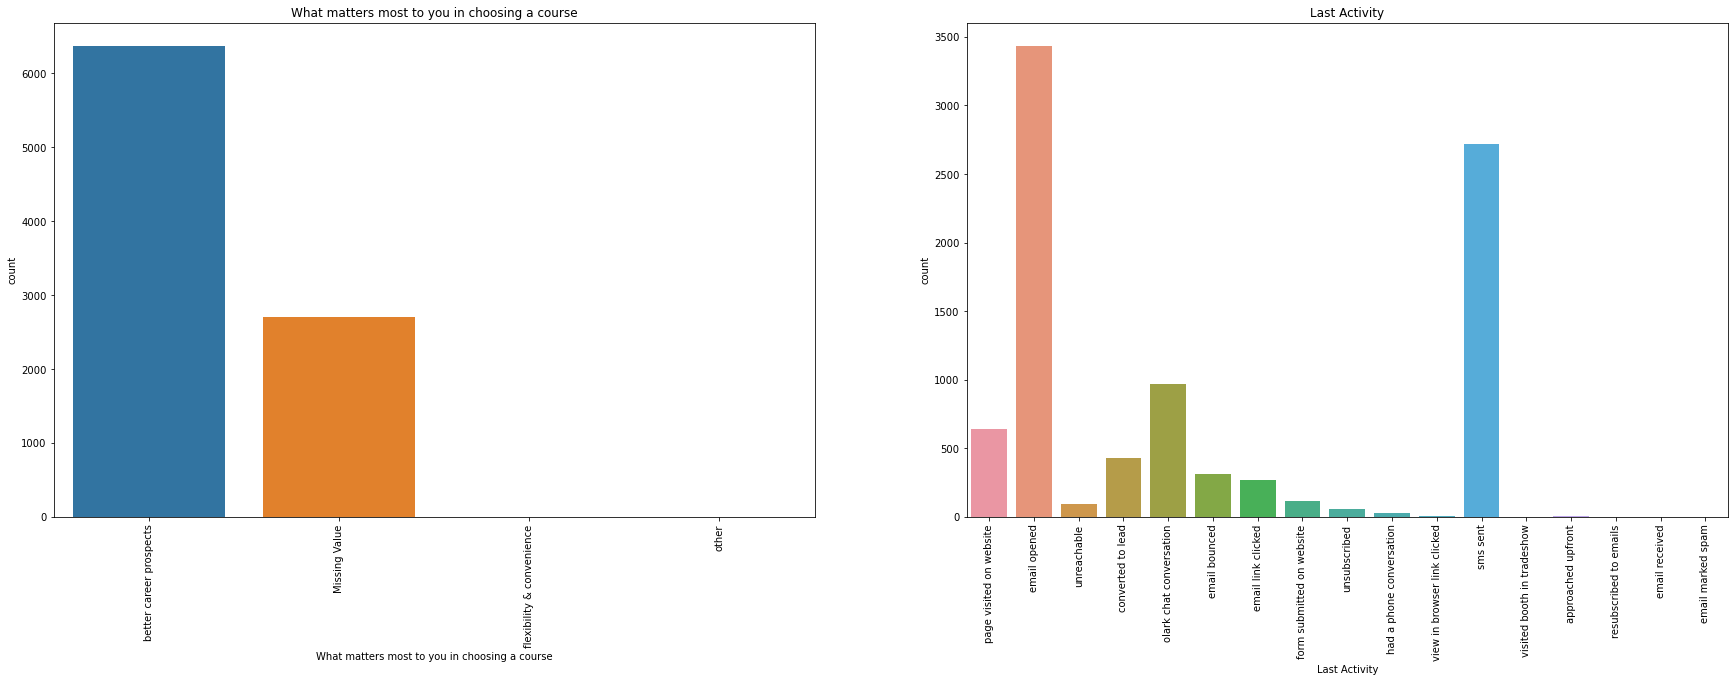

In [26]:
plt.figure(figsize = (30,20))

plt.subplot(2,2,1)
sns.countplot(df_updated['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,2)
sns.countplot(df_updated['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

### Now we will plot a countplot against our target variable

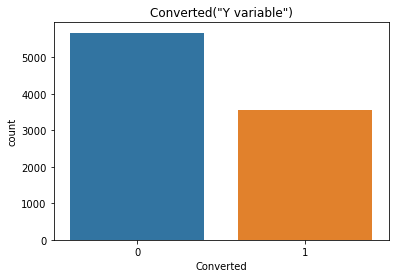

In [27]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### Now we will plot graphs against the numerical variable, namely TotalVisits, Total Time Spent on Website and Page Views Per Visit

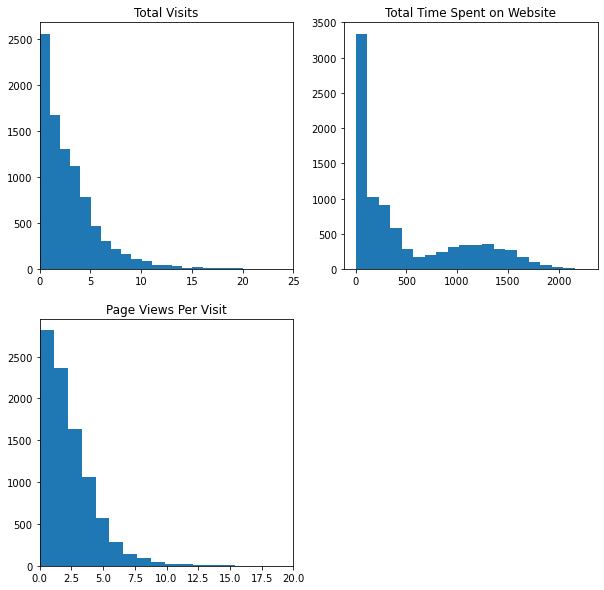

In [28]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_updated['TotalVisits'], bins = 250)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_updated['Total Time Spent on Website'], bins = 20)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_updated['Page Views Per Visit'], bins = 50)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Now we will plot categorical variable against the target variable

Text(0.5, 1.0, 'Lead Origin')

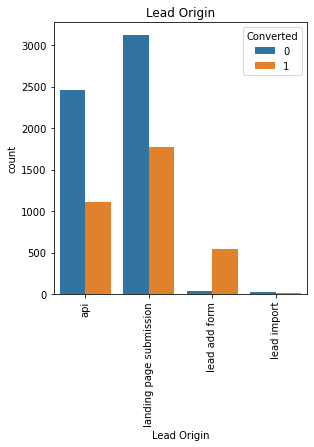

In [29]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

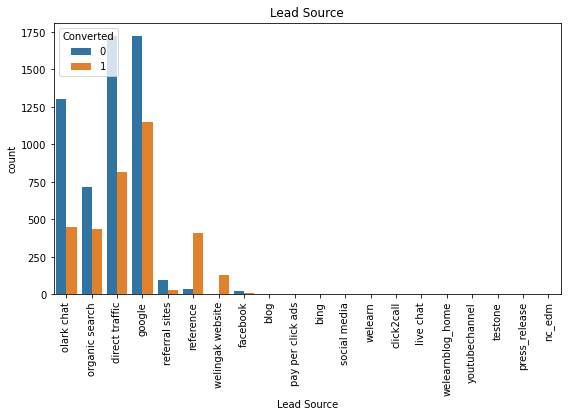

In [30]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

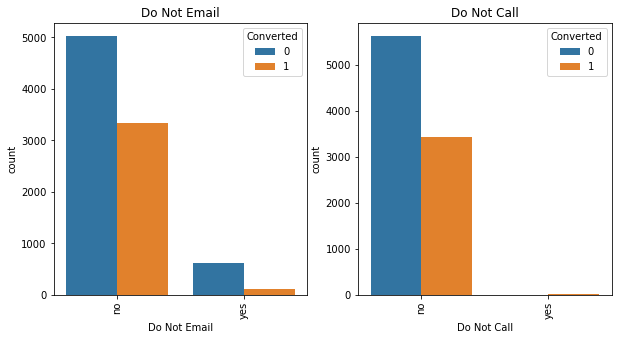

In [31]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

Text(0.5, 1.0, 'Last Activity')

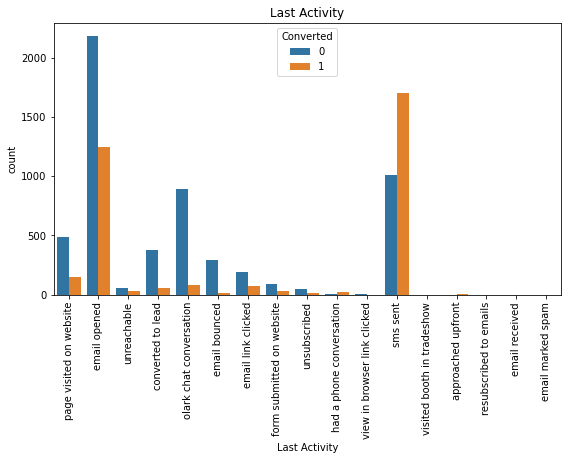

In [32]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

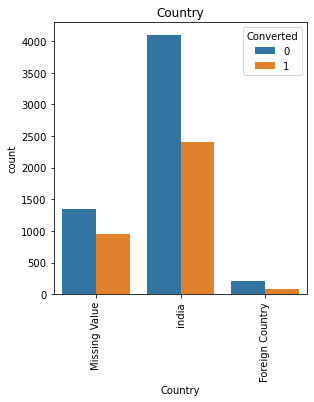

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

Text(0.5, 1.0, 'Specialization')

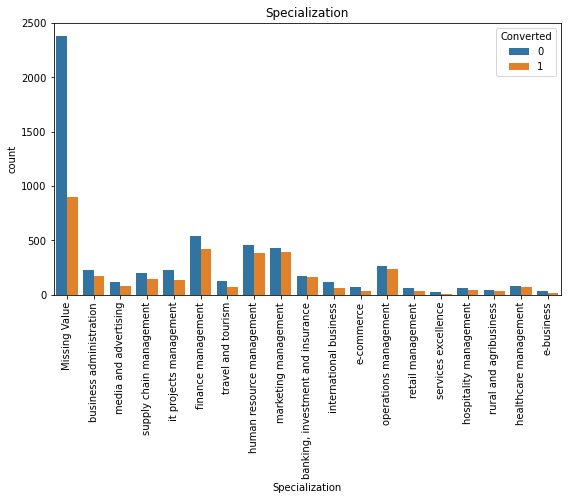

In [34]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

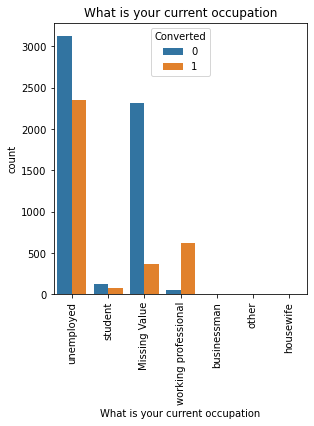

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

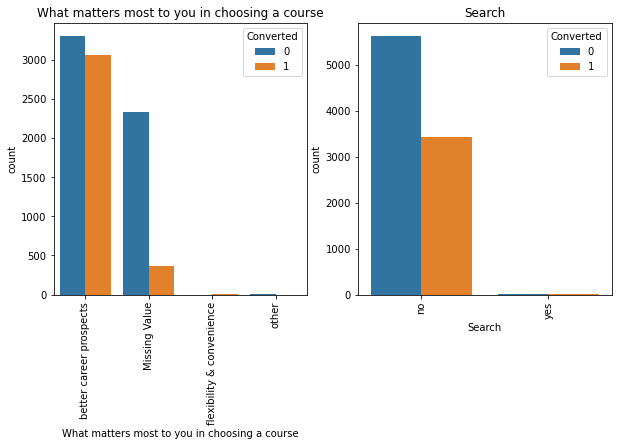

In [36]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

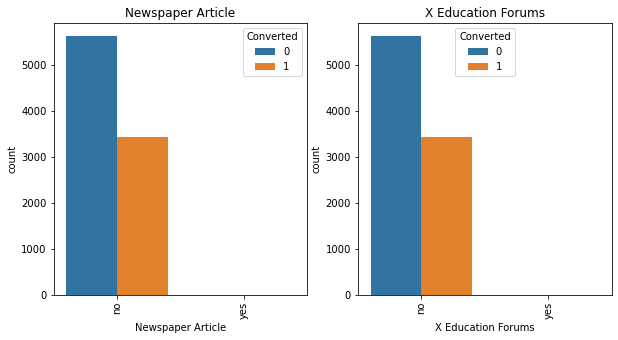

In [37]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

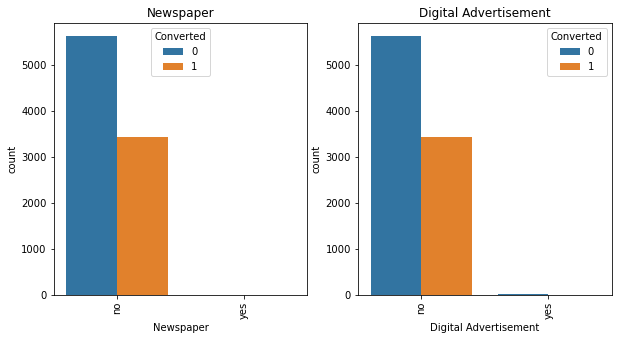

In [38]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

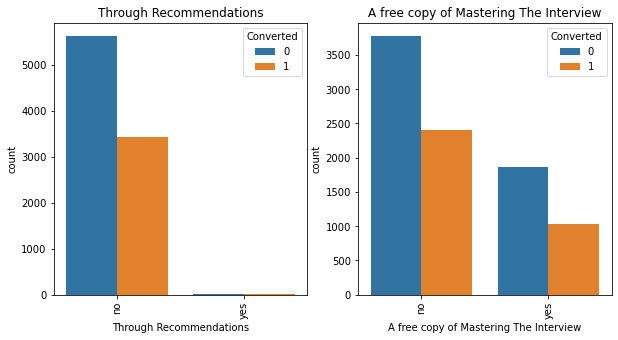

In [39]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

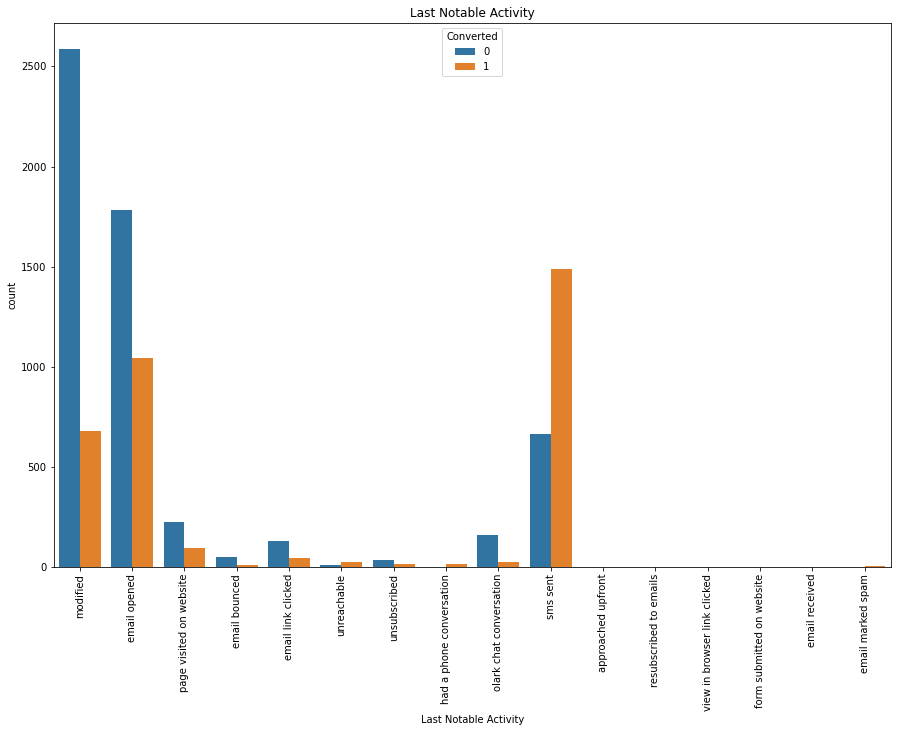

In [40]:
plt.figure(figsize = (15,10))

sns.countplot(x='Last Notable Activity', hue='Converted', data= df_updated).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

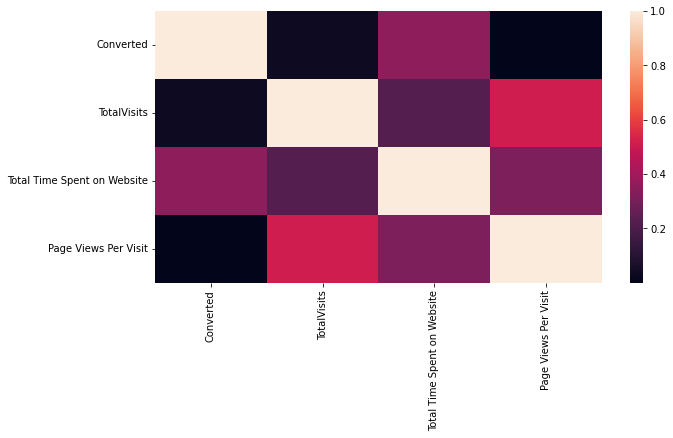

In [41]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df_updated.corr())
plt.show()

### It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis

In [42]:
numeric = df_updated[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


### There aren't any major outliers as observed from the above information given above

## STEP 3 - Creating Dummy Variables

In [43]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [44]:
df_updated.loc[:, df_updated.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
# Creating dummy variables
dummy = pd.get_dummies(df_updated[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_updated, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,Missing Value,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,Foreign Country,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [46]:
df_final_dum = df_final_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## STEP 4 - Test-Train Split

In [47]:
# Import the required library
from sklearn.model_selection import train_test_split

In [48]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
# Putting the target variable in y
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [51]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


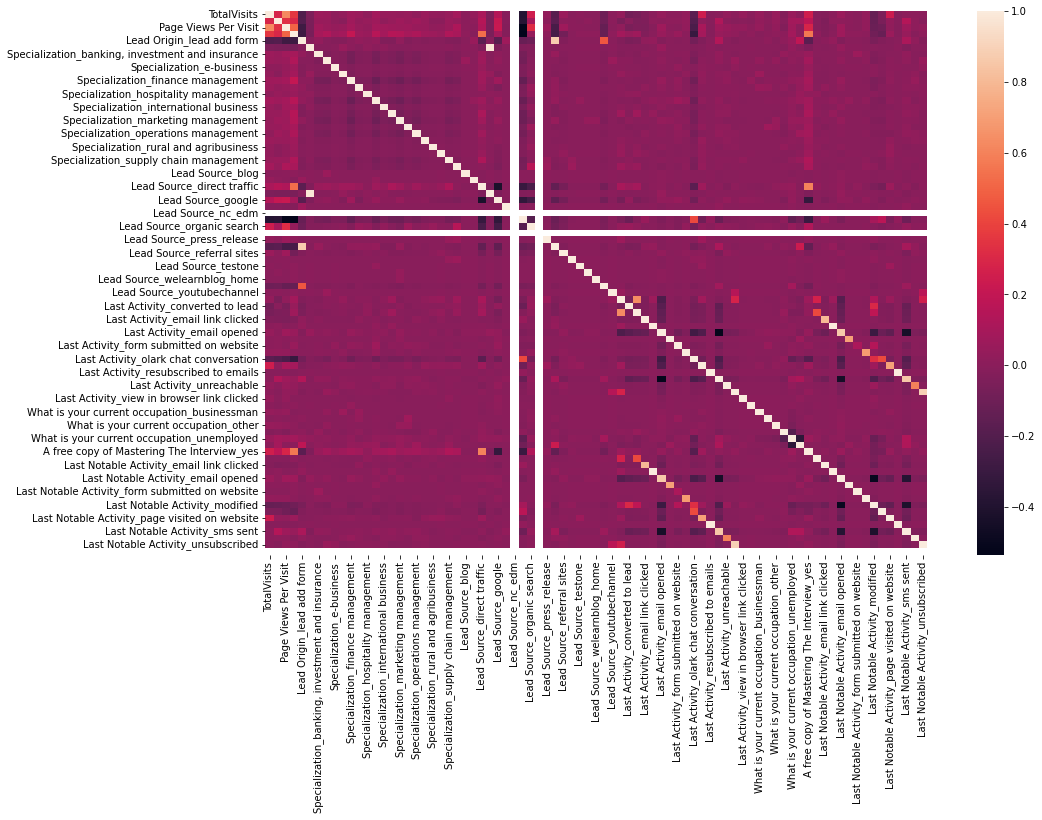

In [52]:
# To check the correlation among varibles
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr())
plt.show()

<font color= green>___Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE___</font>

## Step 5 - Model Building 

In [53]:
# Here we'll import 'LogisticRegression'
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
# As we can see there are many vafriables so for that we'll Import RFE
from sklearn.feature_selection import RFE

In [55]:
# Run the RFE with 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)
rfe = rfe.fit(X_train, y_train)

In [56]:
# Need to check the features that selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 3),
 ('Specialization_banking, investment and insurance', True, 1),
 ('Specialization_business administration', True, 1),
 ('Specialization_e-business', True, 1),
 ('Specialization_e-commerce', True, 1),
 ('Specialization_finance management', True, 1),
 ('Specialization_healthcare management', True, 1),
 ('Specialization_hospitality management', False, 4),
 ('Specialization_human resource management', True, 1),
 ('Specialization_international business', True, 1),
 ('Specialization_it projects management', True, 1),
 ('Specialization_marketing management', True, 1),
 ('Specialization_media and advertising', False, 2),
 ('Specialization_operations management', True, 1),
 ('Specialization_retail management', False, 3),
 ('Specialization_rural and agribusiness

In [57]:
# Here put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

<font color= blue>___Here all the variables selected by RFE and we know the part of statistics (p-values and the VIFs) Now using these variables we need to create logistic regression.___</font>

In [58]:
# Here we are selecting columns selected by RFE
X_train = X_train[col]

In [59]:
# Import the statsmodels
import statsmodels.api as sm

In [60]:
# Need to fit Logistic Regression on X_train
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.3
Date:                Tue, 09 Aug 2022   Deviance:                       5122.6
Time:                        13:40:55   Pearson chi2:                 6.37e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4102
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3659      0.197     -6.932      0.000      -1.752      -0.980
TotalVisits                                              6.1013      1.707      3.574      0.000       2.755       9.448
Total Time Spent on Website                              4.2277      0.161     26.327      0.000       3.913       4.542
Page Views Per Visit                                    -3.8233      0.596     -6.420      0.000      -4.990      -2.656
Lead Origin_landing page submission                     -0.9618      0.120     -8.015      0.000      -1.197      -0.727
Lead Origin_lead add form                                2.3117      0.228     10.121      0.000       1.864       2.759
Specialization_banking, investment and insurance         1.0719      0.200      5.366      0.000       0.680       1.463
Specialization_business administration                   0.6881      0.190      3.618      0.000       0.315       1.061
Specialization_e-business                                0.8436      0.445      1.897      0.058      -0.028       1.715
Specialization_e-commerce                                0.9940      0.321      3.095      0.002       0.365       1.623
Specialization_finance management                        0.7391      0.143      5.178      0.000       0.459       1.019
Specialization_healthcare management                     0.8597      0.278      3.097      0.002       0.316       1.404
Specialization_human resource management                 0.7228      0.147      4.909      0.000       0.434       1.011
Specialization_international business                    0.6117      0.262      2.334      0.020       0.098       1.125
Specialization_it projects management                    0.7827      0.199      3.925      0.000       0.392       1.174
Specialization_marketing management                      0.9117      0.145      6.270      0.000       0.627       1.197
Specialization_operations management                     0.8147      0.175      4.655      0.000       0.472       1.158
Specialization_rural and agribusiness                    0.9703      0.412      2.354      0.019       0.162       1.778
Specialization_services excellence                       1.1186      0.547      2.044      0.041       0.046       2.191
Specialization_supply chain management                   0.8099      0.198      4.095      0.000       0.422       1.198
Specialization_travel and tourism                        0.7815      0.266      2.935      0.003       0.260       1.303
Lead Source_direct traffic                              -0.4451      0.095     -4.686      0.000      -0.631      -0.259
Lead Source_organic search                              -0

In [61]:
# Import the 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
# Need to make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_landing page submission,6.58
2,Page Views Per Visit,4.94
0,TotalVisits,3.26
32,What is your current occupation_unemployed,3.06
37,Last Notable Activity_modified,2.53
35,Last Notable Activity_email opened,2.30
28,Last Activity_sms sent,2.25
1,Total Time Spent on Website,2.22
20,Lead Source_direct traffic,2.22
26,Last Activity_had a phone conversation,1.92


<font color= blue>___Here the VIF values looks fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'___</font>

In [63]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [64]:
# Now refit the model with the new features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.0
Date:                Tue, 09 Aug 2022   Deviance:                       5126.0
Time:                        13:40:56   Pearson chi2:                 6.37e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4099
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3434      0.196     -6.837      0.000      -1.728      -0.958
TotalVisits                                              6.1306      1.707      3.591      0.000       2.785       9.476
Total Time Spent on Website                              4.2224      0.161     26.305      0.000       3.908       4.537
Page Views Per Visit                                    -3.8127      0.595     -6.410      0.000      -4.978      -2.647
Lead Origin_landing page submission                     -0.9586      0.120     -7.991      0.000      -1.194      -0.723
Lead Origin_lead add form                                2.3119      0.229     10.117      0.000       1.864       2.760
Specialization_banking, investment and insurance         1.0820      0.199      5.428      0.000       0.691       1.473
Specialization_business administration                   0.6964      0.190      3.670      0.000       0.324       1.068
Specialization_e-business                                0.8438      0.445      1.897      0.058      -0.028       1.716
Specialization_e-commerce                                0.9862      0.321      3.075      0.002       0.358       1.615
Specialization_finance management                        0.7389      0.143      5.176      0.000       0.459       1.019
Specialization_healthcare management                     0.8603      0.278      3.099      0.002       0.316       1.404
Specialization_human resource management                 0.7186      0.147      4.883      0.000       0.430       1.007
Specialization_international business                    0.6111      0.262      2.332      0.020       0.097       1.125
Specialization_it projects management                    0.7826      0.199      3.924      0.000       0.392       1.174
Specialization_marketing management                      0.9138      0.145      6.288      0.000       0.629       1.199
Specialization_operations management                     0.8144      0.175      4.651      0.000       0.471       1.158
Specialization_rural and agribusiness                    0.9723      0.412      2.359      0.018       0.164       1.780
Specialization_services excellence                       1.1204      0.547      2.047      0.041       0.047       2.193
Specialization_supply chain management                   0.8109      0.198      4.101      0.000       0.423       1.198
Specialization_travel and tourism                        0.7869      0.266      2.959      0.003       0.266       1.308
Lead Source_direct traffic                              -0.4500      0.095     -4.741      0.000      -0.636      -0.264
Lead Source_organic search                              -0

In [65]:
# Need to make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_landing page submission,6.57
2,Page Views Per Visit,4.94
0,TotalVisits,3.25
32,What is your current occupation_unemployed,3.06
36,Last Notable Activity_modified,2.52
35,Last Notable Activity_email opened,2.30
28,Last Activity_sms sent,2.25
1,Total Time Spent on Website,2.22
20,Lead Source_direct traffic,2.22
27,Last Activity_olark chat conversation,1.89


<font color= blue>___here the VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'___</font>

In [66]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [67]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.7
Date:                Tue, 09 Aug 2022   Deviance:                       5141.5
Time:                        13:40:57   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4084
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3147      0.196     -6.712      0.000      -1.699      -0.931
TotalVisits                                              6.0814      1.701      3.576      0.000       2.748       9.414
Total Time Spent on Website                              4.2202      0.160     26.334      0.000       3.906       4.534
Page Views Per Visit                                    -3.8470      0.594     -6.477      0.000      -5.011      -2.683
Lead Origin_landing page submission                     -0.9451      0.120     -7.894      0.000      -1.180      -0.710
Lead Origin_lead add form                                2.3312      0.228     10.205      0.000       1.883       2.779
Specialization_banking, investment and insurance         1.0745      0.199      5.397      0.000       0.684       1.465
Specialization_business administration                   0.6887      0.190      3.633      0.000       0.317       1.060
Specialization_e-business                                0.8314      0.445      1.869      0.062      -0.040       1.703
Specialization_e-commerce                                0.9775      0.320      3.052      0.002       0.350       1.605
Specialization_finance management                        0.7346      0.142      5.159      0.000       0.456       1.014
Specialization_healthcare management                     0.9014      0.276      3.269      0.001       0.361       1.442
Specialization_human resource management                 0.7223      0.147      4.916      0.000       0.434       1.010
Specialization_international business                    0.6035      0.262      2.305      0.021       0.090       1.117
Specialization_it projects management                    0.7752      0.199      3.891      0.000       0.385       1.166
Specialization_marketing management                      0.9074      0.145      6.251      0.000       0.623       1.192
Specialization_operations management                     0.8065      0.175      4.612      0.000       0.464       1.149
Specialization_rural and agribusiness                    0.9595      0.412      2.330      0.020       0.152       1.767
Specialization_services excellence                       1.1134      0.547      2.037      0.042       0.042       2.185
Specialization_supply chain management                   0.8031      0.198      4.065      0.000       0.416       1.190
Specialization_travel and tourism                        0.7766      0.266      2.923      0.003       0.256       1.297
Lead Source_direct traffic                              -0.4510      0.095     -4.759      0.000      -0.637      -0.265
Lead Source_organic search                              -0

In [68]:
# Need to make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_landing page submission,6.57
2,Page Views Per Visit,4.94
0,TotalVisits,3.25
31,What is your current occupation_unemployed,3.05
35,Last Notable Activity_modified,2.52
34,Last Notable Activity_email opened,2.30
28,Last Activity_sms sent,2.25
20,Lead Source_direct traffic,2.22
1,Total Time Spent on Website,2.22
23,Do Not Email_yes,1.89


<font color= blue>___Here the VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'___</font>

In [69]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [70]:
# Now refit the model with the new features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.9
Date:                Tue, 09 Aug 2022   Deviance:                       5149.8
Time:                        13:40:58   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3027      0.196     -6.663      0.000      -1.686      -0.919
TotalVisits                                              6.3082      1.739      3.628      0.000       2.900       9.716
Total Time Spent on Website                              4.2276      0.160     26.400      0.000       3.914       4.541
Page Views Per Visit                                    -3.8381      0.596     -6.444      0.000      -5.005      -2.671
Lead Origin_landing page submission                     -0.9505      0.120     -7.945      0.000      -1.185      -0.716
Lead Origin_lead add form                                2.3401      0.228     10.244      0.000       1.892       2.788
Specialization_banking, investment and insurance         1.0687      0.199      5.372      0.000       0.679       1.459
Specialization_business administration                   0.7033      0.189      3.721      0.000       0.333       1.074
Specialization_e-business                                0.8248      0.445      1.854      0.064      -0.047       1.697
Specialization_e-commerce                                0.9738      0.320      3.042      0.002       0.346       1.601
Specialization_finance management                        0.7369      0.142      5.177      0.000       0.458       1.016
Specialization_healthcare management                     0.8945      0.276      3.245      0.001       0.354       1.435
Specialization_human resource management                 0.7220      0.147      4.914      0.000       0.434       1.010
Specialization_international business                    0.5998      0.262      2.292      0.022       0.087       1.113
Specialization_it projects management                    0.7719      0.199      3.877      0.000       0.382       1.162
Specialization_marketing management                      0.9265      0.145      6.391      0.000       0.642       1.211
Specialization_operations management                     0.8034      0.175      4.597      0.000       0.461       1.146
Specialization_rural and agribusiness                    0.9549      0.412      2.320      0.020       0.148       1.762
Specialization_services excellence                       1.1075      0.546      2.030      0.042       0.038       2.177
Specialization_supply chain management                   0.7991      0.197      4.047      0.000       0.412       1.186
Specialization_travel and tourism                        0.7711      0.266      2.902      0.004       0.250       1.292
Lead Source_direct traffic                              -0.4409      0.095     -4.661      0.000      -0.626      -0.256
Lead Source_organic search                              -0

In [71]:
# Need to make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_landing page submission,6.57
2,Page Views Per Visit,4.94
0,TotalVisits,3.25
30,What is your current occupation_unemployed,3.04
34,Last Notable Activity_modified,2.52
33,Last Notable Activity_email opened,2.30
28,Last Activity_sms sent,2.25
20,Lead Source_direct traffic,2.22
1,Total Time Spent on Website,2.22
23,Do Not Email_yes,1.89


<font color= blue>___Here all the VIF values are good and all the p-values are below 0.05. So we can fix model.___</font>

## Step 6 - Create Prediction on train set

In [72]:
# Here we are predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.736756
3604    0.065990
5584    0.206199
7679    0.071065
7563    0.149022
7978    0.940337
7780    0.148210
7863    0.985255
838     0.643822
708     0.363378
dtype: float64

In [73]:
# Reshape to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.736756  , 0.06598965, 0.20619939, 0.07106502, 0.14902154,
       0.94033718, 0.14821041, 0.98525542, 0.64382241, 0.36337799])

In [74]:
# Need to create Data frame with given conversion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.736756
1,0,0.065990
2,0,0.206199
3,0,0.071065
4,0,0.149022


In [75]:
# Substitute 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.736756,1
1,0,0.065990,0
2,0,0.206199,0
3,0,0.071065,0
4,0,0.149022,0


## Step 7 - Model Evaluation

In [76]:
# Here the importing metrics from sklearn for evaluation
from sklearn import metrics

In [77]:
# Create the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3415,  480],
       [ 702, 1754]], dtype=int64)

In [78]:
# Now check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8138875767595655

<font color= blue>___It is around 81% accuracy which is a very good value___</font>

In [79]:
# Evaluate the metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [80]:
# Calculate sensitivity
TP/(TP+FN)

0.7141693811074918

In [81]:
# Calculate specificity
TN/(TN+FP)

0.8767650834403081

<font color= blue>___Now with the current cut off we have around 81% accuracy, sensitivity of around 71% and specificity of around 87%.___</font>

## Optimal Cutoff (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [82]:
# Define ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

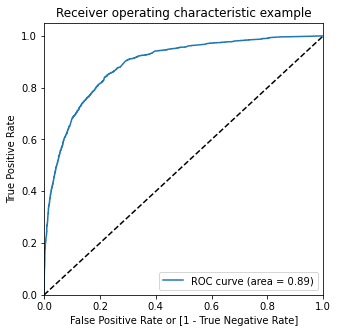

In [84]:
# Need to call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

<font color= blue>___Here the area under ROC curve is 0.89 which is a very good value.___</font>

In [85]:
# Need to create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.736756,1,1,1,1,1,1,1,1,1,0,0
1,0,0.065990,0,1,0,0,0,0,0,0,0,0,0
2,0,0.206199,0,1,1,1,0,0,0,0,0,0,0
3,0,0.071065,0,1,0,0,0,0,0,0,0,0,0
4,0,0.149022,0,1,1,0,0,0,0,0,0,0,0


In [86]:
# Need to create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.622264,0.972313,0.401540
0.2,0.2,0.759251,0.923860,0.655456
0.3,0.3,0.802393,0.850977,0.771759
0.4,0.4,0.810424,0.785016,0.826444
0.5,0.5,0.813888,0.714169,0.876765
0.6,0.6,0.804913,0.618485,0.922465
0.7,0.7,0.788065,0.536238,0.946855
0.8,0.8,0.759093,0.423453,0.970732
0.9,0.9,0.716895,0.287459,0.987677


### From the abov data, a cut off of 0.5 would be appropriate as it gives us an accuracy of 81%, sensitivity of 71% and specificity of approx 88%

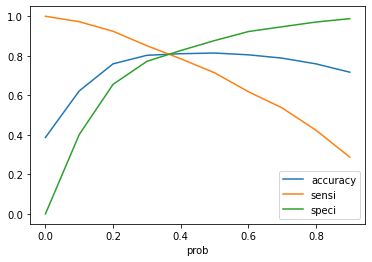

In [87]:
# Plot accuracy, sensitivity & specificity graph
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.736756,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.065990,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.206199,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.071065,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.149022,0,1,1,0,0,0,0,0,0,0,0,0


In [89]:
# Now check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8138875767595655

In [90]:
# Need to create confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3415,  480],
       [ 702, 1754]], dtype=int64)

In [91]:
# Evaluate the metrics
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negative
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Calculate sensitivity
TP/(TP+FN)

0.7141693811074918

In [93]:
# Calculate specificity
TN/(TN+FP)

0.8767650834403081

### With the current cut off as 0.5 we have accuracy, sensitivity and specificity of approx 81%,71% and 88% respectively

## Step 8 - Prediction on test set

In [94]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [95]:
# Substitute all the columns in the final train model
col = X_train.columns

In [96]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,"Specialization_banking, investment and insurance",Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Activity_sms sent,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0.208333,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
7212,1.0,0.028369,0.001320,0.166667,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2085,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4048,1.0,0.028369,0.617077,0.083333,1,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4790,1.0,0.028369,0.005282,0.083333,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8179,1.0,0.170213,0.148768,0.333333,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6236,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5240,1.0,0.078014,0.458627,0.229167,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [97]:
# Store the prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Convert it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.251570
1,1,0.870580
2,1,0.985255
3,1,0.879687
4,0,0.179541


In [98]:
# Now make prediction using cut off 0.5
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.251570,0
1,1,0.870580,1
2,1,0.985255,1
3,1,0.879687,1
4,0,0.179541,0
...,...,...,...
2718,1,0.135869,0
2719,0,0.172567,0
2720,0,0.112802,0
2721,1,0.822408,1


In [99]:
# Now check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8200514138817481

In [100]:
# Now create confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1530,  214],
       [ 276,  703]], dtype=int64)

In [101]:
# Evaluate the metrics
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negative
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negative

In [102]:
# Calculate sensitivity
TP/(TP+FN)

0.7180796731358529

In [103]:
# Calculate specificity
TN/(TN+FP)

0.8772935779816514

### With the current cut off as 0.5 we have accuracy, sensitivity and specificity of around 82%,71% and 88% respectively

## Step 9 - Precision-Recall

In [104]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3415,  480],
       [ 702, 1754]], dtype=int64)

In [105]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7851387645478961

In [106]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7141693811074918

### With the current cut off as 0.5 we have Precision around 78% and Recall around 71%

### Precision and recall tradeoff

In [107]:
from sklearn.metrics import precision_recall_curve

In [108]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [109]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

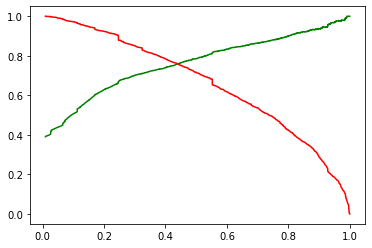

In [110]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.736756,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.065990,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.206199,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.071065,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.149022,0,1,1,0,0,0,0,0,0,0,0,0


In [112]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8140450322783813

In [113]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3325,  570],
       [ 611, 1845]], dtype=int64)

In [114]:
# Evaluate Metrics
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negative
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negative

In [115]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7639751552795031

In [116]:
# Recall = TP / TP + FN
TP / (TP + FN)

0.7512214983713354

### With the current cut off as 0.45 we have Precision around 76% and Recall around 75%

## Step 10 - Prediction on Test set

In [117]:
# Store the prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Convert it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.251570
1,1,0.870580
2,1,0.985255
3,1,0.879687
4,0,0.179541


In [118]:
# Now make prediction using cut off 0.45
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.251570,0
1,1,0.870580,1
2,1,0.985255,1
3,1,0.879687,1
4,0,0.179541,0
...,...,...,...
2718,1,0.135869,0
2719,0,0.172567,0
2720,0,0.112802,0
2721,1,0.822408,1


In [119]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8189496878442893

In [120]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1490,  254],
       [ 239,  740]], dtype=int64)

In [121]:
# Evaluate Metrics
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negative
FP = confusion2[0,1] # false positive
FN = confusion2[1,0] # false negative

In [122]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.744466800804829

In [123]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7558733401430031

### With the current cut off as 0.81 we have Precision around 74% and Recall around 75%

## Conclusion
We have found that the variables that mattered the most in the potential buyers are (In descending order) :
1.	The total time spend on the Website.
2.	Total number of visits.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>
d.	Welingak website<br>
4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add format.
6.	When their current occupation is as a working professional.<br>
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.